# ASSIGNMENT 1 - MACHINE LEARNING (LAB)

## NAMA: Sharon Zefanya Setiawan
## NIM: 2501961022

### Import Libraries and Datasets

In [1]:
# import libraries

import numpy as np 
import pandas as pd 
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load dataset

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Data memiliki 768 records dan 9 attributes yang terdiri dari Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome. 

### EDA

In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Semua attributes merupakan tipe data integer, kecuali BMI dan DiabetesPedigreeFunction yang berupa float. Terdapat 768 non-null count yang artinya tidak ada missing value karena jumlahnya sesuai dengan total records.

In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose memiliki persebaran data yang cukup jauh dari min hingga maxnya. Banyak data yang memiliki min dengan value 0, sehingga perlu dicheck kembali apakah ternyata ada missing value yang diidentifikasi sebagai 0. Hal ini dikarenakan sedikit impossible apabila data kesehatan memiliki value 0, contohnya seperti Glucose, BloodPressure, SkinThickness, Insulin, BMI.

In [5]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Setelah missing value yang bervalue 0 diubah menjadi NaN, yang merupakan simbol missing value berupa data numerik, diketahui bahwa terdapat missing value pada data Glucose, BloodPressure, SkinThickness, Insulin, BMI.

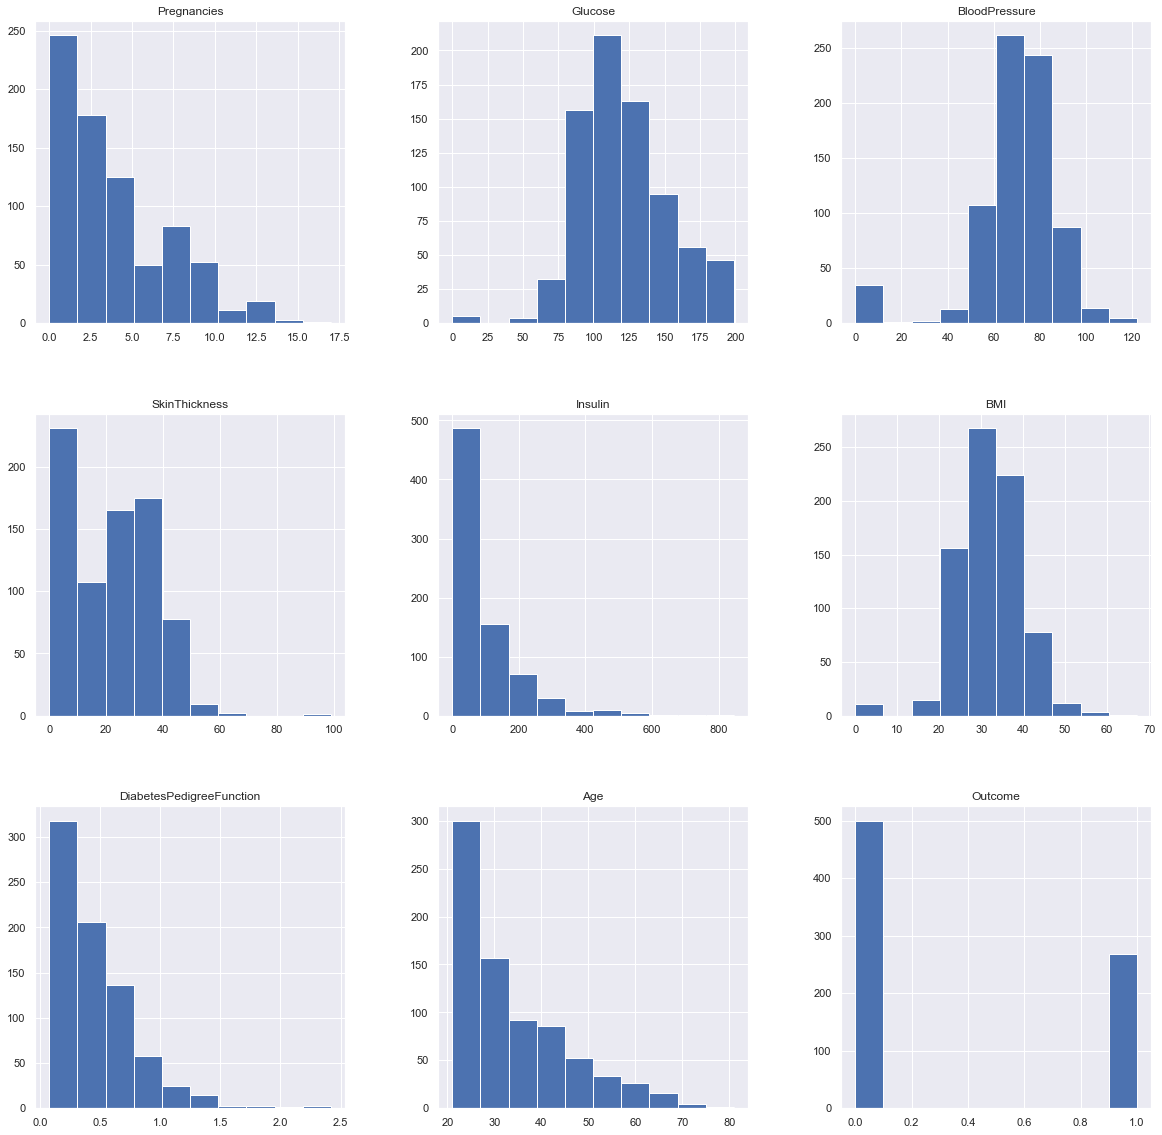

In [7]:
# check data distribution
p = diabetes_df.hist(figsize = (20,20))

Setelah dilakukan visualisasi, ternyata banyak data yang skewed ke kiri. Maka, perlu kita check persebaran data dengan menggantikan mean ke missing value.

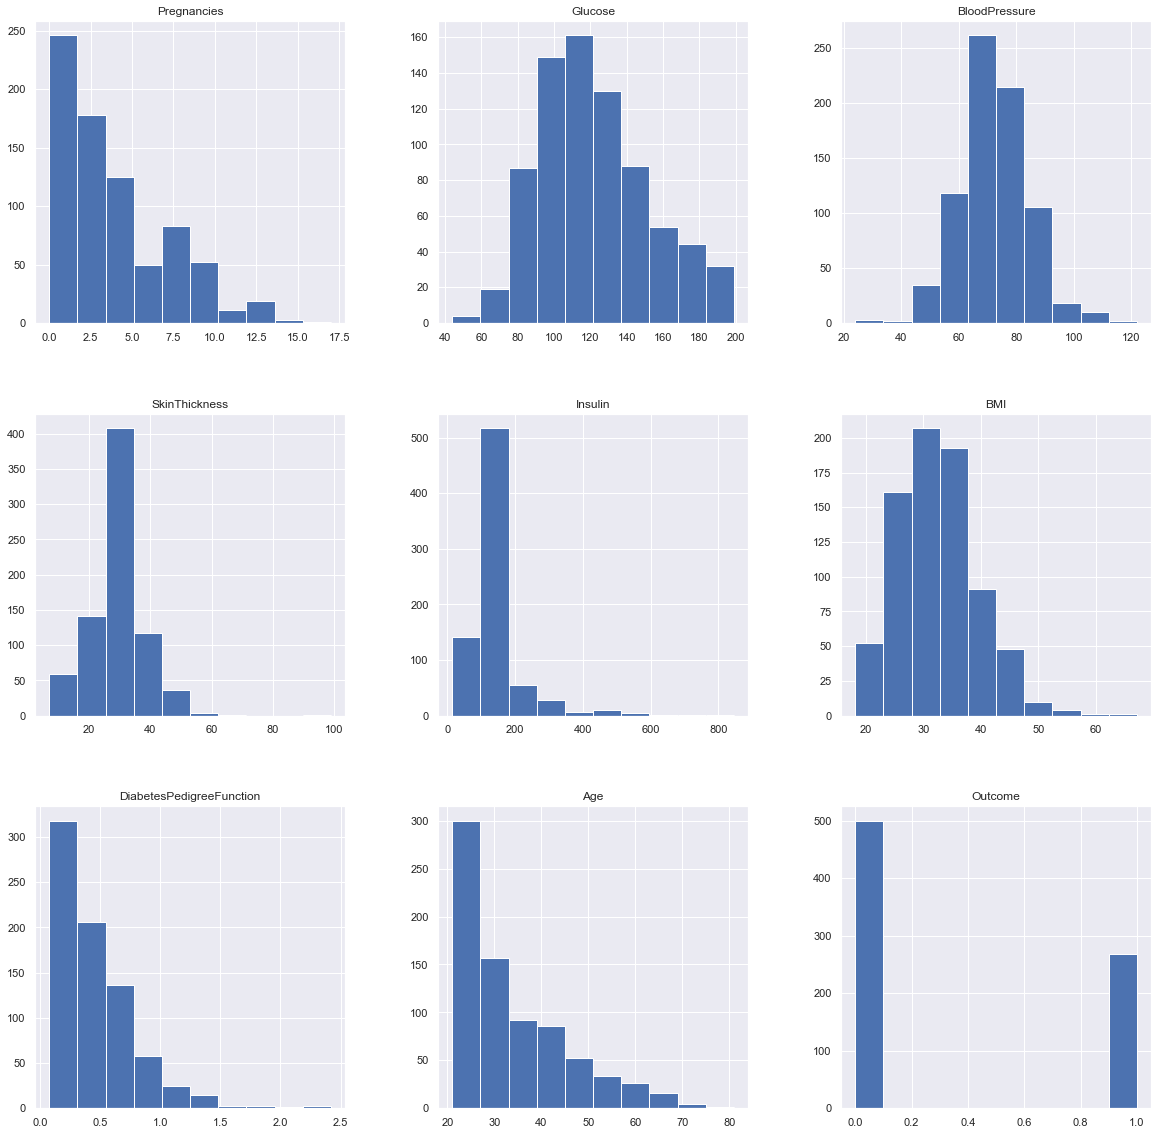

In [8]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

p = diabetes_df_copy.hist(figsize = (20,20))

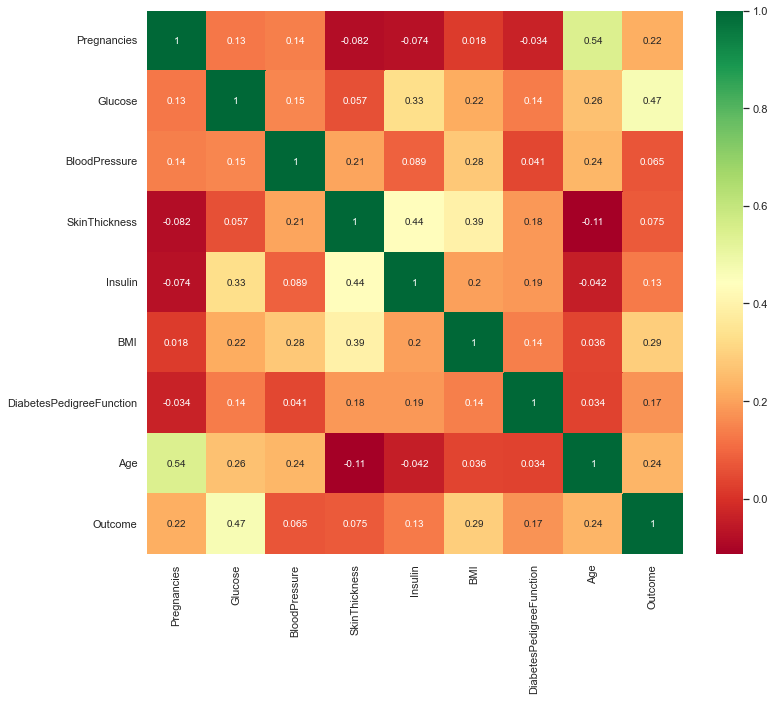

In [9]:
# check correlation
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

Semua variabel tidak ada yang berkorelasi di atas 0.75 sehingga semua variabel aman untuk dibangun modelnya.

### Data Scaling

In [10]:
# scaling the data (independent variable)

diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [12]:
y = diabetes_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Data Splitting

In [13]:
# split dataset
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [14]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (514, 8)
X_test: (254, 8)
y_train: (514,)
y_test: (254,)


### SVC

In [15]:
# SVM Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [16]:
svc_pred = svc_model.predict(X_test)
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[138  24]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       162
           1       0.71      0.63      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.75       254
weighted avg       0.77      0.77      0.77       254



- Accuracy Score: 0.77
- Recall Score: 0.74

Model tergolong baik dengan recall dan accuracy yang cukup tinggi, namun perlu diperhatikan bahwa precision nya sebesar 0.75, dimana artinya precision lebih tinggi dibandingkan recall. Kondisi ini kurang cocok digunakan untuk dataset diabetes.

### Decision Tree

In [17]:
# building model using decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))

[[121  41]
 [ 26  66]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       162
           1       0.62      0.72      0.66        92

    accuracy                           0.74       254
   macro avg       0.72      0.73      0.72       254
weighted avg       0.75      0.74      0.74       254



- Accuracy Score: 0.75
- Recall Score: 0.75

Model tergolong baik dengan recall dan accuracy yang cukup tinggi. Dibandingkan dengan SVC, precision nya sebesar 0.74. Meskipun tergolong cukup tinggi, namun persentasenya masih lebih rendah dibandingkan recall, yang artinya model dengan decision tree lebih baik daripada SVC.

### KNN

In [19]:
# building model using KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
knn_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[121  41]
 [ 26  66]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       162
           1       0.62      0.72      0.66        92

    accuracy                           0.74       254
   macro avg       0.72      0.73      0.72       254
weighted avg       0.75      0.74      0.74       254



- Accuracy Score: 0.75
- Recall Score: 0.75

Model tergolong baik dengan recall dan accuracy yang cukup tinggi dengan precision sebesar 0.74. Hasil yang diperoleh sama dengan menggunakan algoritma decision tree.

### SVC Grid Search

In [21]:
svcparam_grid = {'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), svcparam_grid, refit=True, verbose=1)
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=1)

In [22]:
svc_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [23]:
svcgrid = SVC(C=1, gamma=0.1, kernel='rbf')
svcgrid.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [24]:
svcgrid_pred = svcgrid.predict(X_test)
print(confusion_matrix(y_test, svcgrid_pred))
print(classification_report(y_test, svcgrid_pred))

[[138  24]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.70      0.62      0.66        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.76      0.77      0.76       254



- Accuracy Score: 0.77
- Recall Score: 0.74

Model tergolong baik dengan recall dan accuracy yang cukup tinggi, namun perlu diperhatikan bahwa precision nya sebesar 0.75, dimana artinya precision lebih tinggi dibandingkan recall. Kondisi ini kurang cocok digunakan untuk dataset diabetes. Tidak ada perbedaan antara SVC yang sudah dituning maupun tidak dituning.

### Decision Tree Grid Search

In [25]:
dtparam_grid = {
    'max_depth': [2, 3, 5, 7, 9, 10, 11, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dtparam_grid, refit=True, verbose=1)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=1)

In [26]:
dt_grid.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [27]:
dtgrid = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
dtgrid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [28]:
dtgrid_pred = dtgrid.predict(X_test)
print(confusion_matrix(y_test, dtgrid_pred))
print(classification_report(y_test, dtgrid_pred))

[[135  27]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       162
           1       0.66      0.57      0.61        92

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.73      0.74      0.73       254



- Accuracy Score: 0.74
- Recall Score: 0.70

Model tergolong baik dengan recall dan accuracy yang cukup tinggi, namun perlu diperhatikan bahwa precision nya sebesar 0.71, dimana artinya precision lebih tinggi dibandingkan recall. Kondisi ini kurang cocok digunakan untuk dataset diabetes. Dibandingkan dengan algoritma decision tree tanpa tuning, algoritma ini lebih buruk.

### Ensemble Learning

In [29]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, BaggingClassifier

#### Voting Classifier

In [30]:
estimators1 = [('SVM', svc_model), ('Decision Tree', dtree), ('KNN', knn)]

vc1 = VotingClassifier(estimators1, voting='hard')
vc1 = vc1.fit(X_train, y_train)
vc1

VotingClassifier(estimators=[('SVM', SVC()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier())])

In [31]:
vc_pred1 = vc1.predict(X_test)
print(confusion_matrix(y_test, vc_pred1))
print(classification_report(y_test, vc_pred1))

[[135  27]
 [ 31  61]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       162
           1       0.69      0.66      0.68        92

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



- Accuracy Score: 0.78
- Recall Score: 0.75 

Model tergolong baik dengan recall dan accuracy yang cukup tinggi, namun perlu diperhatikan bahwa precision nya sebesar 0.76, dimana artinya precision lebih tinggi dibandingkan recall. Kondisi ini kurang cocok digunakan untuk dataset diabetes.

In [32]:
estimators2 = [('Decision Tree', dtree), ('KNN', knn)]

vc2 = VotingClassifier(estimators2, voting='hard')
vc2 = vc2.fit(X_train, y_train)
vc2

VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier())])

In [33]:
vc_pred2 = vc2.predict(X_test)
print(confusion_matrix(y_test, vc_pred2))
print(classification_report(y_test, vc_pred2))

[[144  18]
 [ 43  49]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       162
           1       0.73      0.53      0.62        92

    accuracy                           0.76       254
   macro avg       0.75      0.71      0.72       254
weighted avg       0.76      0.76      0.75       254



- Accuracy Score: 0.77
- Recall Score: 0.75 

Model tergolong baik dengan recall dan accuracy yang cukup tinggi, namun perlu diperhatikan bahwa precision nya sebesar 0.75, dimana artinya precision sama dengan recall. Hal ini perlu dipertimbangkan lebih lanjut. 

#### AdaBoost Classifier

In [34]:
base_estimator = DecisionTreeClassifier(max_depth=1)

ac = AdaBoostClassifier(base_estimator=base_estimator)
ac = ac.fit(X_train, y_train)
ac

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [35]:
ac_pred = ac.predict(X_test)
print(confusion_matrix(y_test, ac_pred))
print(classification_report(y_test, ac_pred))

[[124  38]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       162
           1       0.60      0.62      0.61        92

    accuracy                           0.71       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.71      0.71      0.71       254



- Accuracy Score: 0.71
- Recall Score: 0.69

Model tergolong baik dengan recall dan accuracy yang cukup tinggi, namun perlu diperhatikan bahwa precision nya sebesar 0.69, dimana artinya precision sama dengan recall. Hal ini perlu dipertimbangkan lebih lanjut. 

#### Bagging Classifier

In [36]:
bc = BaggingClassifier(base_estimator=base_estimator)
bc = bc.fit(X_train, y_train)
bc

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [37]:
bc_pred = bc.predict(X_test)
print(confusion_matrix(y_test, bc_pred))
print(classification_report(y_test, bc_pred))

[[129  33]
 [ 38  54]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       162
           1       0.62      0.59      0.60        92

    accuracy                           0.72       254
   macro avg       0.70      0.69      0.69       254
weighted avg       0.72      0.72      0.72       254



- Accuracy Score: 0.74
- Recall Score: 0.69

Model tergolong baik dengan recall dan accuracy yang cukup tinggi, namun perlu diperhatikan bahwa precision nya sebesar 0.72, dimana artinya precision jauh lebih tinggi dibandingkan recall. Kondisi ini kurang cocok digunakan untuk dataset diabetes.

### Best Model

Model harus memiliki nilai recall yang tinggi karena model dengan recall yang tinggi berarti memprediksi pasien yang terkena diabetes padahal tidak terkena diabetes. Jika kita memprediksi dengan precision yang lebih tinggi akan lebih fatal karena precision memprediksi pasien yang tidak terkena diabetes padahal terkena diabetes. 

**Kesimpulan: Recall tinggi didampingi accuracy yang tinggi**

Berdasarkan hasil dari nilai recall dan accuracynya, menurut saya, model terbaik ada pada Decision Tree dan KNN karena antara nilai recall dan accuracy nya masih seimbang. Selain itu, jumlah precisionnya masih lebih sedikit dibandingkan recall. Meskipun nilai precision tergolong cukup tinggi, namun saya mengusahakan nilai accuracy dan recall yang masih seimbang dengan tetap mendapatkan nilai precision sekecil mungkin. Dibandingkan dengan algoritma lain, nilai accuracy dan recallnya mungkin ada yang lebih baik, namun nilai precisionnya lebih tinggi atau sama dengan nilai recall sehingga perlu banyak pertimbangan. 

**Best Model: Decision Tree & KNN**